# Optimization for Data Science 2024 Homework 1

Students:

Alberto Calabrese Nº:2103405

Greta d'Amore Grelli Nº:2122424

Eleonora Mesaglio Nº:2103402

Marlon Helbing Nº:2106578

## 1. Generating the dataset

In [1]:
import numpy as np

# Set a seed for deterministic outputs
SEED = 42
np.random.seed(seed = SEED)

### A - MATRIX

In [2]:
NUM_SAMPLES = 1000
NUM_FEATURES = 1000

# Generate a 1000x1000 matrix with random samples from a standard normal distribution
# This is our data matrix, which contains 1000 samples (rows) with 1000 features each (columns)
data_matrix = np.random.normal(0, 1, size = (NUM_SAMPLES, NUM_FEATURES))
A = data_matrix 

### X - MATRIX

In [3]:
NUM_LABELS = 50

# This is our weight matrix that we initialize like this ; these weights we want to learn
# it has 1000 features (rows) with 50 labels each (columns)
weight_matrix = np.random.normal(0, 1, size = (NUM_FEATURES, NUM_LABELS))
X = weight_matrix

### E - MATRIX

In [4]:
NUM_EXAMPLES = 1000

# This matrix is used to help generating our supervised gold labels 
# It is of size 1000 training examples (rows) and their labels (columns)
generative_matrix = np.random.normal(0, 1, size = (NUM_EXAMPLES, NUM_LABELS))
E = generative_matrix

### AX + E

In [5]:
# Create a vector with numbers from 1 to 50
label_vector = np.arange(1, 51)

In [6]:
# Now he wants us to calculate AX+E to generate labels for the 1000 training examples (such that we have a supervised learning set) 

result_matrix = A @ X + E

print(result_matrix.shape)

(1000, 50)


## 2. MAX INDEX AS CLASS LABEL

In [7]:
# We find our labels by considering the max index in the row as the class label

# Find the column indices of maximum values for each row
labels = np.argmax(result_matrix, axis=1)

print(labels.shape)
print(labels)

(1000,)
[ 7 43 44  7 49 21 10 15 41 43 33 45  8 31 35 29 28 46 36 36  4 23 14  0
  8 29 20 31  8  7 27 47 12 11 33  3  5 16  7 25 10 46 27 41 28  0  1  2
 20 48 39 49 36 10 32  4 22 15 11 19 20 30 17 38 49 15 15 12 11  4  5 35
  5  4 36  5 34 47 15  0 34  2 35 38 41 21 41 14 29 24  7  0 30  0  9 29
 24 12 21 45 49 23  7 26 21  5 36 43 42 30 25 26 39  6 44 21 26 37  0 36
 47 22  2 46  5  4 10 10 17  3 43  1 20  9 28 11  9 48 23 35 26 11 27 36
 28 27 42 35 35 16 34 42 12  2  7 44 41 40 46 23 33  9  0 42 26 43 29 15
 13  7  4  4 33 10  7 32 16 32 30 15 32 48 21  7 12 22 32 19 17 13 26 38
 38  3 31 35 19 49 20 39 34 36  4 21 24 21 47 26 39 43 33 28 45 21 13 22
 23 15 37 23 30  9 38 44 10  1 27 37 10 16 24  3 29 21  5 25 40 36 26 22
 37 12 18 10 10 13  4 39 22 19 33 12 16 44 11 22 21 12  4 45 43 28  9 27
 48 40 41 13 15 34 32 36 41 19 43 23  6  9 41 40 18 23 28 41 26 30 15 28
 27 36 10 34 16 14  8 49  9 47 21 49 28  9 34 17 45 25 48  6 36 25 38 11
 26 31 48 49 27 21 33  9  1  7 43 37 15 15 

## 3. Gradient Descent

In [8]:
# Greta's gradient descent (maybe the best until now)

# Set the learning rate
lr = 0.001

# Set the number of iterations
num_iter = 1000

# Set the clip value for gradient clipping
clip_value = 1.0

# Define the cost function
def cost_function(A, X, E):
    return np.linalg.norm(A @ X - E)

# Define the gradient of the cost function
def gradient(A, X, E):
    return A.T @ (A @ X - E)

# Define the update rule for gradient descent
def gradient_descent_update(X, grad, lr, clip_value):
    grad = np.clip(grad, -clip_value, clip_value)
    return X - lr * grad


# Define the update rule for SGD
def sgd_update(X, grad, lr):
    i = np.random.randint(X.shape[0])
    return X - lr * grad[i]

# Solve AX = E with gradient descent
for _ in range(num_iter):
    cost = cost_function(A, X, E)
    grad = gradient(A, X, E)
    grad = np.clip(grad, 0, clip_value)
    X = gradient_descent_update(X, grad, lr, clip_value)
    
    print(f"Iteration {_}, Cost {cost}")


Iteration 0, Cost 7062.540944462908
Iteration 1, Cost 7058.564149649318
Iteration 2, Cost 7054.590416112481
Iteration 3, Cost 7050.619744159276
Iteration 4, Cost 7046.652134584871
Iteration 5, Cost 7042.687588866512
Iteration 6, Cost 7038.726106010487
Iteration 7, Cost 7034.767686802632
Iteration 8, Cost 7030.81233159511
Iteration 9, Cost 7026.860041419597
Iteration 10, Cost 7022.910817361277
Iteration 11, Cost 7018.964660218834
Iteration 12, Cost 7015.021569621433
Iteration 13, Cost 7011.081546320264
Iteration 14, Cost 7007.1445896128735
Iteration 15, Cost 7003.210701030832
Iteration 16, Cost 6999.279882497515
Iteration 17, Cost 6995.352135471452
Iteration 18, Cost 6991.427461436924
Iteration 19, Cost 6987.505860961296
Iteration 20, Cost 6983.587335285285
Iteration 21, Cost 6979.671884552603
Iteration 22, Cost 6975.7595074443925
Iteration 23, Cost 6971.8502061708705
Iteration 24, Cost 6967.9439825455165
Iteration 25, Cost 6964.040838074096
Iteration 26, Cost 6960.140773057184
Iteratio

In [9]:
def softmax(scores):
        exp_scores = np.exp(scores)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

In [10]:
def multi_class_logistic_regression(A, X, E, labels, lr , num_iterations):
    # Number of samples
    NUM_SAMPLES = A.shape[0]
    # Number of labels
    NUM_LABELS = np.max(labels) + 1

    # Softmax function to convert scores into probabilities
    def softmax(scores):
        exp_scores = np.exp(scores)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    for i in range(num_iterations):
        # Predicted probabilities
        result_matrix = A @ X + E
        probabilities = softmax(result_matrix)

        # One-hot encoded labels
        one_hot_labels = np.eye(NUM_LABELS)[labels]

        # Loss using cross-entropy loss formula
        loss = -np.sum(one_hot_labels * np.log(probabilities)) / NUM_SAMPLES

        # Gradient of the loss w.r.t scores is (probabilities - one_hot_labels)
        grad_scores = probabilities - one_hot_labels

        # Gradient of the loss w.r.t weights X
        grad_weights = A.T @ grad_scores / NUM_SAMPLES

        # Update weights using gradient descent algorithm
        X -= lr * grad_weights

    return X

In [11]:
# Define the learning rate and the number of iterations for gradient descent
learning_rate = 0.001
num_iterations = 1000
clip_value = 1.0

# Define the loss function
def loss_function(A, X, E):
    AX = np.matmul(A, X)
    result_matrix = AX + E
    a = np.max(result_matrix, axis=1, keepdims=True)
    loss = -np.sum(a + np.log(np.sum(np.exp(result_matrix - a), axis=1)))
    return loss

# Define the gradient of the loss function
def gradient(A, X, E):
    AX = np.matmul(A, X)
    result_matrix = AX + E
    a = np.max(result_matrix, axis=1, keepdims=True)
    softmax = np.exp(result_matrix - a) / np.sum(np.exp(result_matrix - a), axis=1, keepdims=True)
    gradient = -np.matmul(A.T, (1 - softmax))
    return gradient

# Perform gradient descent
for i in range(num_iterations):
    # Calculate the loss and the gradient
    loss = loss_function(A, X, E)
    grad = gradient(A, X, E)

    # Clip the gradient to prevent it from exploding
    grad = np.clip(grad, -clip_value, clip_value)

    # Update the weights using the gradient
    X = X - learning_rate * grad

    # Print the loss every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}, Loss: {loss}")


Iteration 0, Loss: -40703736.97920373
Iteration 100, Loss: -41195096.64513688
Iteration 200, Loss: -42139500.883366056
Iteration 300, Loss: -43459194.28934045
Iteration 400, Loss: -45057200.99965033
Iteration 500, Loss: -46861565.84821312
Iteration 600, Loss: -48820750.66171546
Iteration 700, Loss: -50888901.21406503
Iteration 800, Loss: -53039597.567445464
Iteration 900, Loss: -55259189.41756573


In [12]:
# Define the negative log-likelihood function
def cost_func(A, X, labels):
    scores = np.dot(A, X)
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    corect_logprobs = -np.log(probs[range(NUM_EXAMPLES), labels])
    data_loss = np.sum(corect_logprobs)
    return data_loss


# Define the function to compute the gradient of the negative log-likelihood function
def gradient(A, X, labels):
    scores = np.dot(A, X)
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    probs[range(NUM_EXAMPLES), labels] -= 1
    dW = np.dot(data_matrix.T, probs)
    return dW

In [13]:
# Define the learning rate and the number of iterations
learning_rate = 0.01
num_iterations = 1000

# Perform gradient descent
for i in range(num_iterations):
    grad = gradient(data_matrix, weight_matrix, labels)
    weight_matrix -= learning_rate * grad

    if i % 100 == 0:
        print("iteration %d: loss %f" % (i, cost_func(data_matrix, weight_matrix, labels)))

iteration 0: loss 4.146766
iteration 100: loss 0.207946
iteration 200: loss 0.116930
iteration 300: loss 0.082825
iteration 400: loss 0.064673
iteration 500: loss 0.053311
iteration 600: loss 0.045492
iteration 700: loss 0.039762
iteration 800: loss 0.035373
iteration 900: loss 0.031897


In [14]:
NUM_LABELED = 500
Y_0 = np.random.rand(NUM_SAMPLES, NUM_LABELS) # define an appropriate starting point
assert Y_0.shape == (NUM_SAMPLES, NUM_LABELS)

EPSILON = 1e-6 # define small epsilon for stopping criterion
MAX_ITER = 2000 # and/or a maximum number of iterations (or even a maximum time)

ALPHA = 0.01 # define a fixed stepsize

In [15]:
import time

Y_iterates = [Y_0]
times = [0]
start = time.time()

grad = gradient(data_matrix, weight_matrix, labels)
while len(Y_iterates) < MAX_ITER and np.linalg.norm(grad) > EPSILON: # TO DO: write the condition for the while loop
    new_y = Y_iterates[-1] - ALPHA * grad # write the update
    Y_iterates.append(new_y)
    times.append(time.time() - start)
    # Check the stopping criterion
    grad = gradient(data_matrix, weight_matrix, labels)


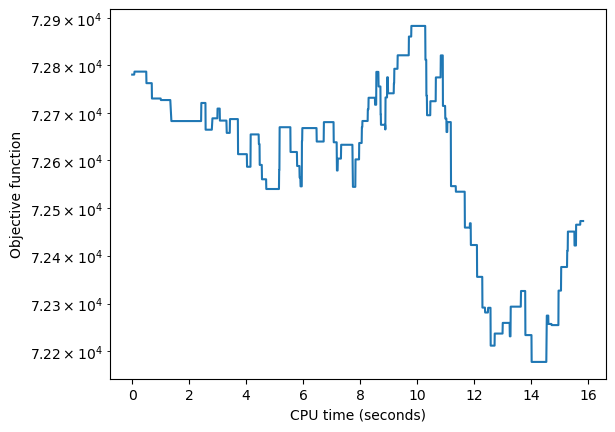

In [16]:
import matplotlib.pyplot as plt

plt.plot(times, [cost_func(data_matrix, weight_matrix, np.argmax(y, axis=1)) for y in Y_iterates])
plt.xlabel('CPU time (seconds)')
plt.ylabel('Objective function')
plt.yscale("log")
plt.show()

## 4. BCGD with Randomized Rule

We define as a block a single column in the parameter matrix $X$. Thus, one block defines all features for a single class. As this is a column vector in the matrix $X$, our partial gradient is now only dependent on $c$ (because we have a gradient for all the features of one class).


Our partial derivative for one block then looks like the following

\begin{equation}
\frac{\partial f(X)}{\partial X_{c}} = - A^{T} \cdot (L^{I} - Q) = A^{T} \cdot (- L^{I} + Q)
\end{equation}



where 

$A$ has form $m \times d$ ; it is our given matrix A.
\
$L^{I}$ has form $m \times 1$ ; it is the indicator vector containing $1$'s only at the positions where the label of the current sample $i$ is equal to $c$ and $0$'s everywhere else.
$$
L_{i}^{I}=\begin{cases}
			1 \quad & \text{if $label_{i} = c $}\\
            0 \quad & \text{otherwise}
		 \end{cases}
$$
\
$Q$ has form $m \times 1$ ; it is the vector calculating the exponential expression $\dfrac{\exp(x_{c}^{T}a_{i})}{\sum_{c' = 1}^{k} \exp(x_{c'}^{T}a_{i}) }$ for each sample $i$

Thus, our result will be of form $d \times 1$

Note that the calculations needed for $L^{I}$ and $Q$ only depend on $c$ and $i$ . However, as we know all the samples $i$, we construct the vectors $L^{I}$ and $Q$ which are then only dependent on $c$ .



In [17]:
####### NOT TESTED YET ########
m = 1000 # samples
d = 1000 # features
k = 50   # labels

## Cost function 

In [18]:
def cost_function(X,A):
    # X_l is m x d, where each row is a column of X and depends on what label the sample has
    # for example, the first row of X_l is the column vector of matrix X at the index of the label that sample 1 has
    X_l = np.zeros((m,d))
    # Iterate over all labels and notice that we have a label for each sample, thus we can use idx directly
    for idx,label in enumerate(labels):
        X_l[idx,:] = X[:,label]

    # Make negative
    X_l = -1 * X_l
    # Now we have to manually calculate the double sum 
    final_sum = 0
    current = 1 # initial so np.log(1) = 0
    for sample_idx in range(m):
        final_sum += np.log(current)
        current = 0 # so we have the correct start value
        for label_idx in range(k):
            current += np.exp(np.dot((X[:,label_idx]).T, A[sample_idx,:]))

  
 
    return np.sum(np.einsum('ij,ji->i', X_l, A)) + final_sum

        







In [19]:
####### NOT TESTED YET ########
m = 1000 # samples
d = 1000 # features
k = 50   # labels

def partial_gradient(c):


    # We define the partial gradient
    
    # Calculating indicator vector L 

    # Initialize empty L in size of all samples (=1000)
    L = np.zeros((m,1))

    # Iterate over labels of each sample
    for idx,label in enumerate(labels):
        # If there is a label match
        if label == c:
            # We assign a 1
            L[idx] = 1
        # If there is no match
        else:
            # We assign a 0
            L[idx] = 0

    # Calculating vector Q

    # Initialize empty Q in size of all samples (=1000)
    
    Q = np.zeros((m,1))

        
    # Iterate over all samples
    for curr_sample in range(m):
    
        nominator = (np.exp(np.dot(np.expand_dims((X[:,c]),axis=1).T , np.expand_dims(A[curr_sample,:], axis=1)))).item()
    
        denominator = 0
        # Iterate over all labels for the denominator
        for curr_label in range(k):
            denominator += (np.exp(np.dot(np.expand_dims((X[:,curr_label]), axis=1).T , np.expand_dims(A[curr_sample,:], axis=1)))).item()
    
       
        Q[curr_sample] = nominator/denominator



    return np.squeeze(np.dot(A.T ,((-1 * L) + Q)),axis=1)

    





    

    
    


In [20]:
import random
X_0 = X
# Calculate Loss in the beginning

#loss = cost_function(X_0, A)


for i in range(1000): # 1000 iterations
    curr_c = random.randint(0,k-1)
    if i % 50 == 0:
        print("iteration %d: loss %f" % (i, cost_function(X_0, A)))
    # Gradient step

    
    X_0[:, curr_c] = X_0[:, curr_c] - 0.01 * partial_gradient(curr_c) 









iteration 0: loss 58054.207471
iteration 50: loss 60250.009963
iteration 100: loss 61066.675254
iteration 150: loss 61282.141181
iteration 200: loss 61473.423807
iteration 250: loss 61546.950419
iteration 300: loss 61608.784709
iteration 350: loss 61666.499547
iteration 400: loss 61712.793823
iteration 450: loss 61754.149074
iteration 500: loss 61793.271974
iteration 550: loss 61830.497804
iteration 600: loss 61863.740127
iteration 650: loss 61895.442909
iteration 700: loss 61925.300490
iteration 750: loss 61951.006257
iteration 800: loss 61975.659628
iteration 850: loss 62000.817753
iteration 900: loss 62026.372959
iteration 950: loss 62049.697400
